# 8. XGBoost

Based on our training data `2_data/X_train.csv` and `2_data/y_train.csv`, we want to apply XGBoost. 

In [12]:
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [13]:
df = pd.read_csv("../2_data/X_train_outlierremoved.csv")

# Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train_outlierremoved.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train_outlierremoved.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3885, 91)
X_test shape: (1409, 91)
y_train shape: (3885,)
y_test shape: (1409,)


In [14]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and evaluate the model
accuracy_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
precision_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='precision')
recall_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
f1_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
roc_auc_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')

# Calculate the averages
average_scores = {
    'accuracy': accuracy_scores.mean(),
    'precision': precision_scores.mean(),
    'recall': recall_scores.mean(),
    'f1': f1_scores.mean(),
    'roc_auc': roc_auc_scores.mean()
}

# Convert the averages to a DataFrame
average_scores_df = pd.DataFrame([average_scores])

# Save the averages to a CSV file
average_scores_df.to_csv("../2_data/evaluation_metrics/XGBoost_cv_outlier.csv", index=False)

In [16]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.95
Precision: 0.97
Recall: 0.86
F1: 0.91
ROC AUC: 0.92


In [17]:
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/XGBoost_prediction_outlier.csv", index=False)


## Evaluation

1. **Accuracy**
    - Accuracy measures the proportion of correct classifications made by the model. In the context of customer churn prediction, it indicates the overall number of customers correctly classified as either churned or not churned.
    - In this project, an accuracy of 0.96 suggests that the XGBoost model performs very well in distinguishing between customers who will churn and those who will not. However, accuracy alone may not be the most reliable metric for an imbalanced dataset, like churn prediction, where the number of churned customers is much smaller compared to non-churned customers.

2. **Precision and Recall**
    - Precision is the proportion of correctly predicted positive observations (churned customers) out of all observations predicted to be positive.
    - Recall is the proportion of correctly predicted positive observations out of all actual positive observations (all churned customers).
    - In churn prediction, precision helps to minimize false positives, ensuring that customers classified as likely to churn are actually at risk of churning. Recall helps to minimize false negatives, ensuring the model does not miss many of the churned customers. These metrics are particularly useful when dealing with imbalanced datasets.
    - The XGBoost model achieved a precision of 0.97 and a recall of 0.90, indicating that it is excellent at identifying most of the churned customers with a very low number of false positives.

3. **F1-Score**
    - The F1-Score is the harmonic mean of precision and recall, providing a balance between both metrics. It is particularly useful when you need a single score that considers both false positives and false negatives.
    - In churn prediction, the F1-score is useful because it provides a balance between precision and recall, especially when a high recall or high precision alone might not be sufficient. The XGBoost model achieved an F1-score of 0.93, indicating an excellent balance between precision and recall.

4. **ROC-AUC Score**
    - The ROC-AUC score measures the ability of the model to distinguish between positive and negative classes (churned vs. not churned). It is a summary of the ROC curve, where AUC represents the area under the curve. A higher AUC value indicates better performance in distinguishing between the two classes.
    - In churn prediction, the ROC-AUC score helps evaluate the model's ability to correctly differentiate churned customers from those who do not churn. It is particularly useful in assessing different thresholds to understand the model's overall performance in distinguishing between classes. The XGBoost model achieved a ROC-AUC score of 0.94, indicating excellent performance in distinguishing between churned and non-churned customers.


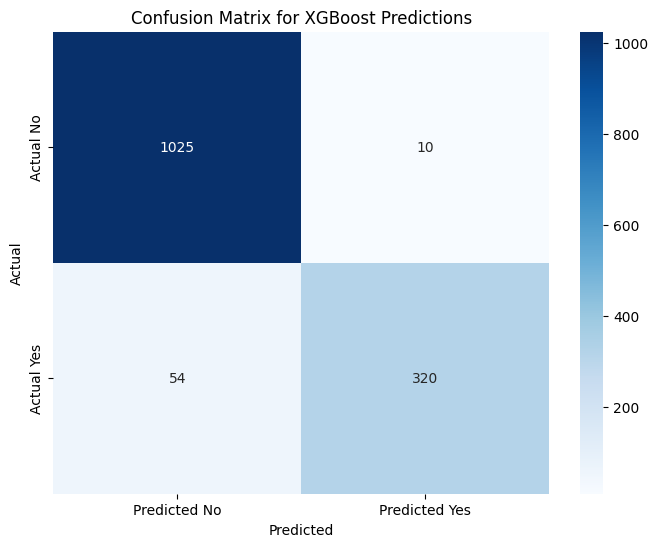

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Predictions')
plt.show()

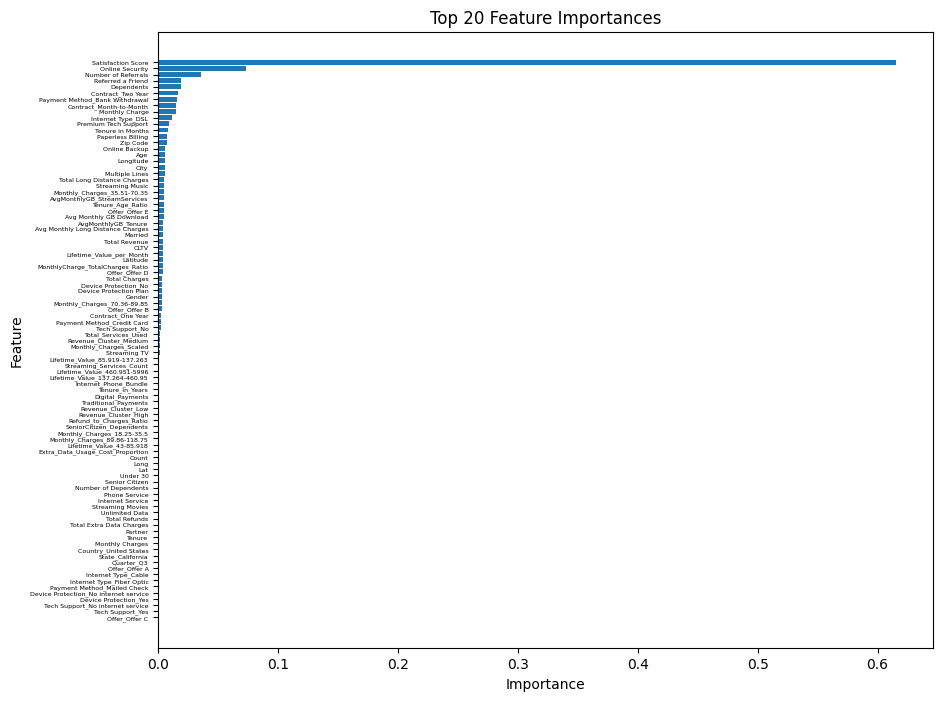

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(fontsize=4.5)
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(feature_importance_df.sort_values(by='Importance', ascending=False))

                                  Feature  Importance
35                     Satisfaction Score    0.615628
20                        Online Security    0.072988
13                    Number of Referrals    0.035706
12                      Referred a Friend    0.019242
6                              Dependents    0.019232
53                      Contract_Two Year    0.016632
54         Payment Method_Bank Withdrawal    0.015736
51                Contract_Month-to-Month    0.015199
29                         Monthly Charge    0.014496
49                      Internet Type_DSL    0.011692
23                   Premium Tech Support    0.008810
14                       Tenure in Months    0.007875
28                      Paperless Billing    0.007222
9                                Zip Code    0.007202
21                          Online Backup    0.006048
2                                     Age    0.005931
11                              Longitude    0.005805
8                           

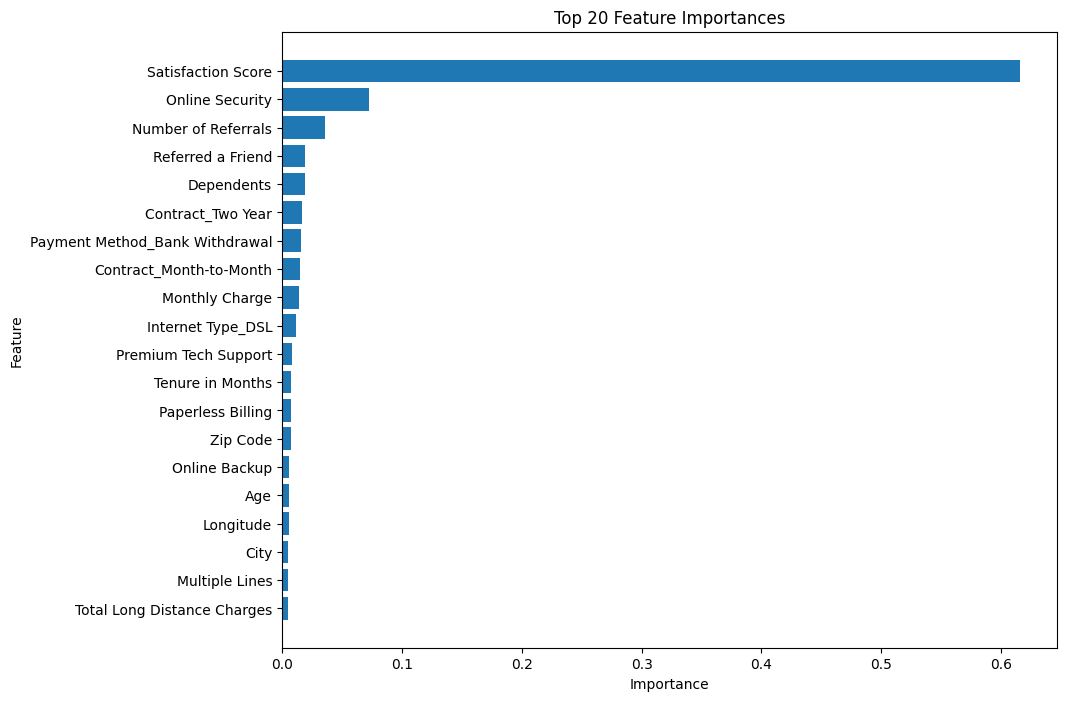

In [21]:
# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [22]:
model.save_model("../6_dashboard/xgboost_model.json")